### Stock price history
Downloaded as csv file from https://www.quandl.com/product/WIKIP/WIKI/PRICES-Quandl-End-Of-Day-Stocks-Info

  -rw-r--r--@ 1 yoavfreund  503   1.7G May 27 00:18 WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv  
  -rw-r--r--@ 1 yoavfreund  503   449M May 29 17:41 WIKI_PRICES_212b326a081eacca455e13140d7bb9db.zip  

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv')
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,29.367758,32.272262,25.817810,28.399591,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,27.714581,27.753307,25.694399,26.062292,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,26.663343,28.399591,25.856536,28.399591,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,27.436863,28.166360,25.984323,25.984323,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,25.905464,27.073889,25.821544,26.505815,3464400.0


In [4]:
from collections import Counter
tickers=Counter(df['ticker'])

In [5]:
len(tickers)

3187

In [7]:
tickers.items()[:5]

[('AGO', 3297), ('AGN', 7039), ('AGM', 5482), ('PKY', 11118), ('TPLM', 3030)]

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


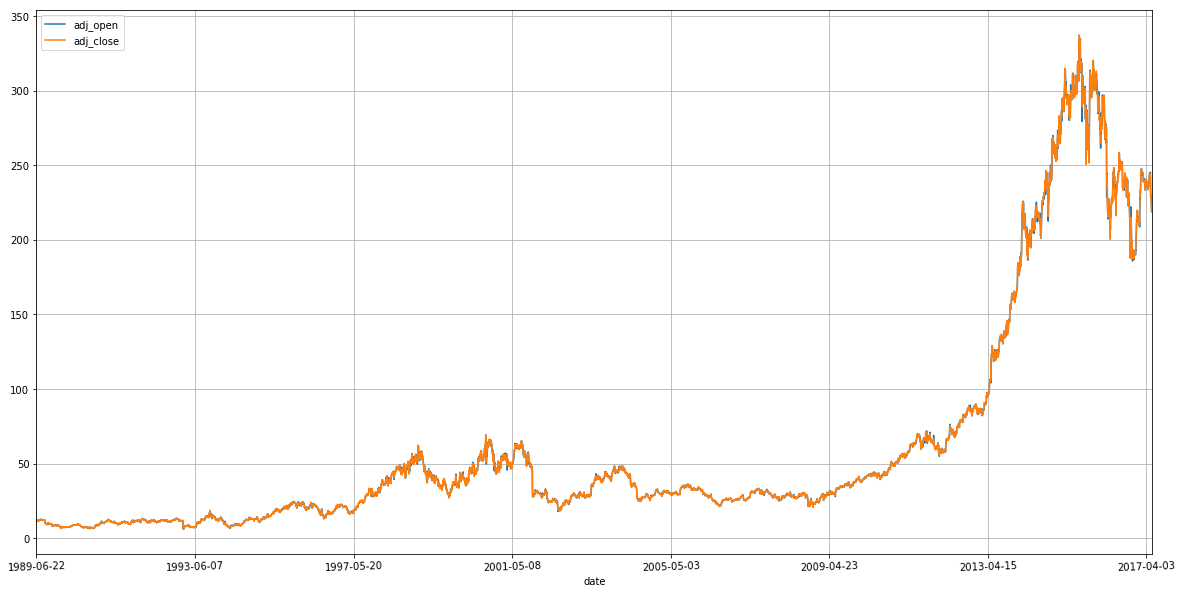

In [9]:
df[df.ticker=='AGN'].plot('date',['adj_open','adj_close'],figsize=(20,10),rot=2);
grid()

In [12]:
df1=df[['date','ticker','adj_open','adj_close']]
df1.head()

,date,ticker,adj_open,adj_close
0,1999-11-18,A,29.367758,28.399591
1,1999-11-19,A,27.714581,26.062292
2,1999-11-22,A,26.663343,28.399591
3,1999-11-23,A,27.436863,25.984323
4,1999-11-24,A,25.905464,26.505815


In [13]:
table=df1.pivot(index='date',columns='ticker',values='adj_open')

In [14]:
table.shape

(14069, 3187)

In [15]:
table.head()

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZIOP,ZIXI,ZLC,ZLTQ,ZMH,ZNGA,ZOES,ZQK,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
M=np.array(table)

In [17]:
M.shape

(14069, 3187)

In [18]:
R=np.log(M[1:,:]/M[:-1,:])

In [19]:
R.shape

(14068, 3187)

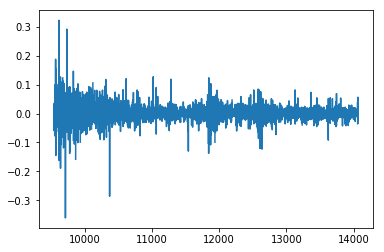

In [20]:
plot(R[:,0])

In [25]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X.shape

(6, 2)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
R=np.nan_to_num(R.transpose())
pca.fit(R)


print(pca.explained_variance_ratio_) 


[ 0.10536527  0.01559985  0.01061226]


In [42]:
A=pca.fit_transform(R)
A.shape

(14068, 3)

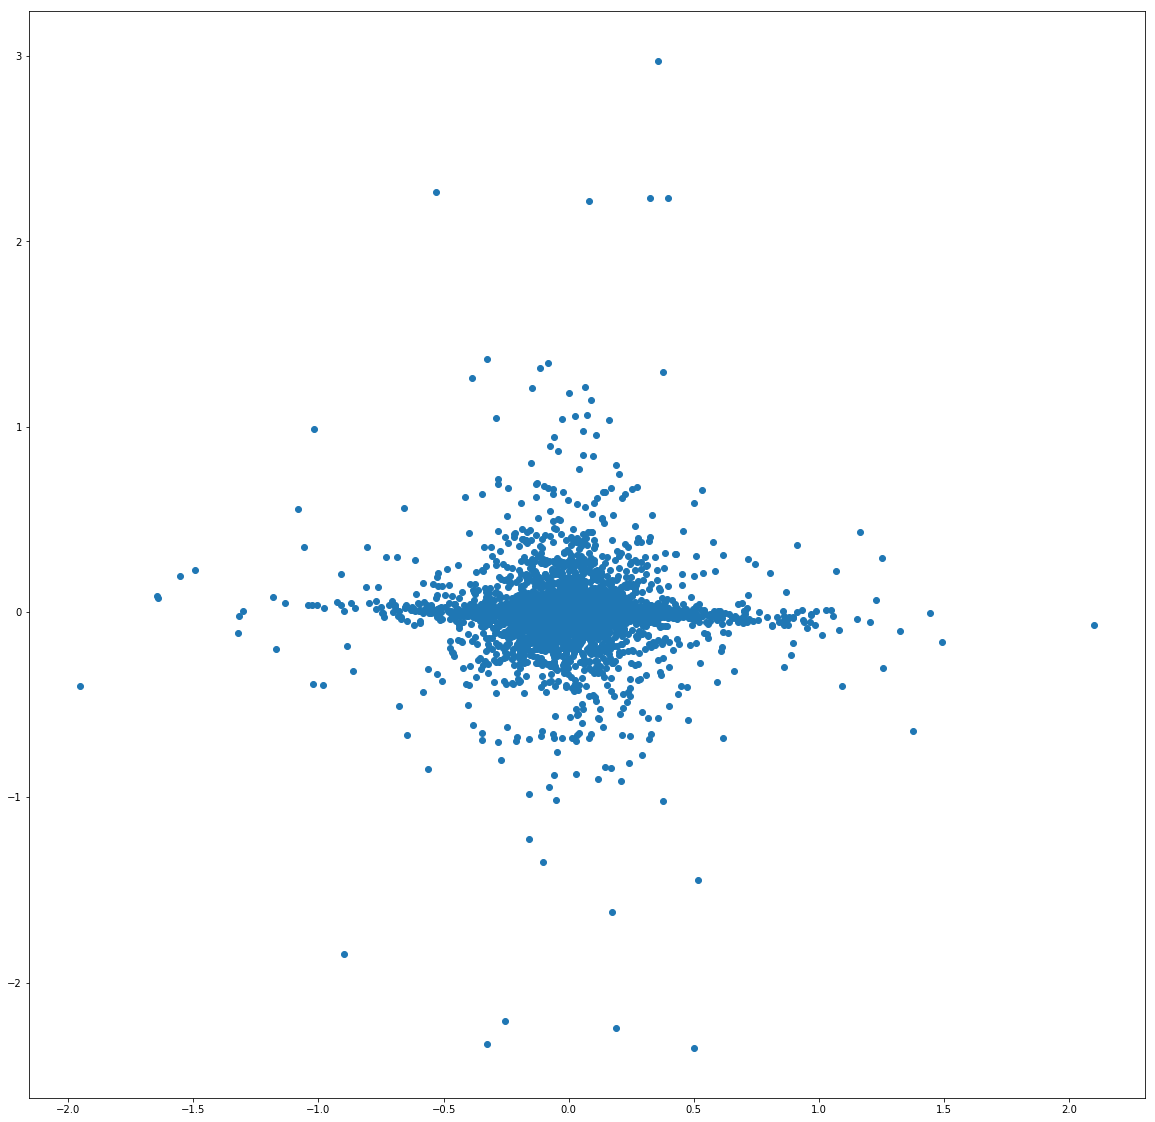

In [43]:
figure(figsize=(20,20))
scatter(A[:,1],A[:,2])

In [40]:
L=np.array(df[df.ticker=='AGN']['adj_open'])

In [41]:
len(L)

7039

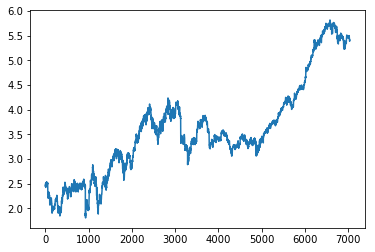

In [67]:
#%pylab inline 
LL=log(L)
plot(LL)

In [176]:
def calc_splitpoints(R,count):
    return arange(R[0],R[1],(R[1]-R[0])/(count*1.00001))
def Box_count(LL):
    X_range=[0,len(LL)]
    Y_range=[min(LL),max(LL)]
    Y_range,X_range

    max_exp=12
    N=np.zeros([max_exp,2])
    for E in range(max_exp):
        count=2**E
        X=[int(x) for x in calc_splitpoints(X_range,count)]
        Ystep=(Y_range[1]-Y_range[0])/count

        T=np.zeros(count)
        for i in range(count):
            xmin,xmax=X[i:i+2]
            S=LL[xmin:xmax]
            T[i]=int(max(S)/Ystep)+1-int(min(S)/Ystep)
        N[E,:]=[count,sum(T)]
    dim=(log(N[-1,1])-log(N[4,1]))/(log(N[-1,0])-log(N[4,0]))
    print 'dim=',dim
    plot(log(N[:,0]),log(N[:,1]));
    xlabel('log 1/epsilon')
    ylabel('log N');
    grid()
    return N,dim

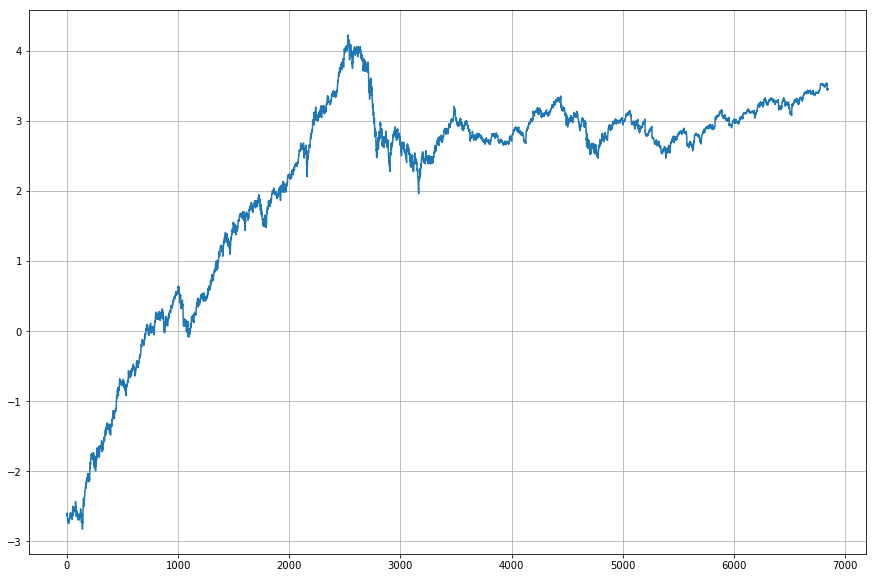

In [177]:
figure(figsize=(15,10))
L=np.array(df[df.ticker=='CSCO']['adj_open'])
LL=log(L)
plot(LL)
grid()
#plot(LL[8000:8500])

dim= 1.25582672465


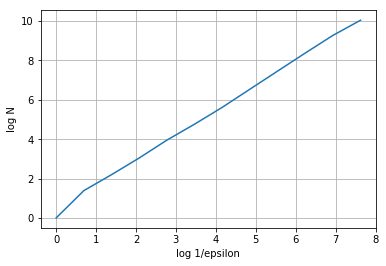

In [178]:
N,dim=Box_count(LL)

In [179]:
x=arange(-1,1,0.0001)
y=sin(8*x)

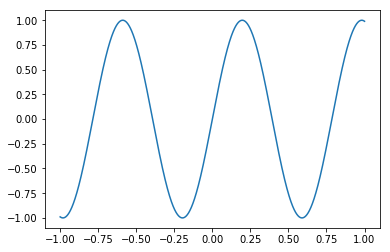

In [180]:
plot(x,y)

dim= 1.00206248332


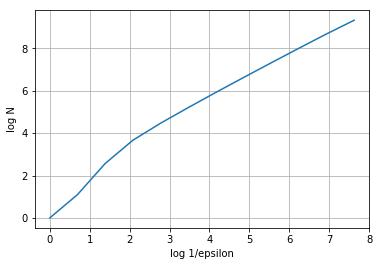

In [181]:
N,dim=Box_count(y)

array([  1.,  10.,   1.,  10.,   1.,  10.,   1.,  10.,   1.,  10.])

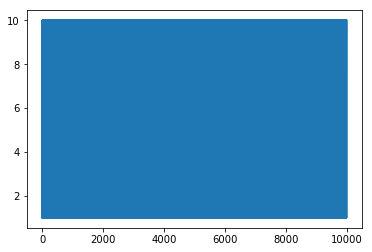

In [182]:
LL=np.array([1.,10.]*5000)
plot(LL)
LL[:10]

dim= 1.98760591825


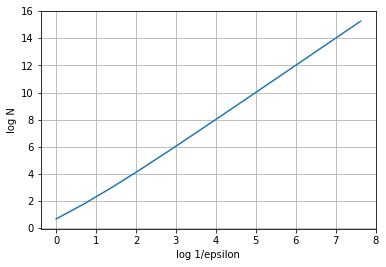

In [184]:
N,dim=Box_count(LL)